In [1]:
import tensorflow as tf
import numpy as np
from predictor import Predictor
import matplotlib.pyplot as plt
import pandas as pd
import math
from  models import esum2, esum
import random

In [2]:
input_width = 2**10
label_width = 4
shift = 4
sections = int(math.log2(input_width))
model = "models/spectral2"
# model = dense_model((input_width, sample_width), units=2 ** 12, sections=sections)
predictor = Predictor("datas/EURUSD_H1 copy.csv", model,
    input_width=input_width,
    label_width=label_width,
    shift=shift,
    train_ratio=0.8,
    val_ratio=0.1,
    test_ratio=0.1,
    batch_size=256,
)

Размер train: 43447
Размер validation: 5430
Размер test: 5432
Размер окна: 1028
Размер входа: 1024
Размер выхода: 4
Индексы входа: [   0    1    2 ... 1021 1022 1023]
Индексы выхода: [1024 1025 1026 1027]


tf.Tensor(
[[ 0.07  0.48 -0.33 ...  0.12  0.2  -0.24]
 [ 0.48 -0.33  0.43 ...  0.2  -0.24  0.61]
 [-0.33  0.43  0.85 ... -0.24  0.61 -0.75]
 ...
 [ 1.06  0.46 -0.85 ... -0.53  0.69  1.01]
 [ 0.46 -0.85  2.78 ...  0.69  1.01  0.17]
 [-0.85  2.78  1.42 ...  1.01  0.17 -0.04]], shape=(63, 1024), dtype=float64)


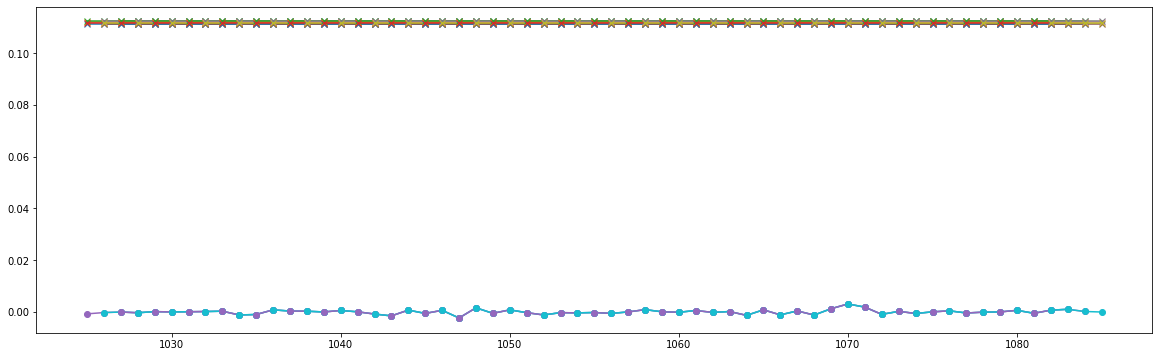

In [7]:
df = pd.read_csv(
    "datas/EURUSD_H1 copy.csv", sep="\t", header=0, dtype={"open": float,"close": float,"tickvol": float,"vol": float},
    parse_dates=[[0,1]],
    index_col=[0],
    names=["date","time","open","high","low","close","tickvol","vol","spread"])
t_count = input_width+2**6
t_shift = random.randint(0,2**10)
prices = df['open'][-t_count-t_shift:-1-t_shift]
ds = predictor.dataloader.make_dataset(prices)
di = predictor.dataloader.make_input(prices)
f = predictor.predict(prices)
# do = predictor.dataloader.make_output(di,f)
for i in di:
    print(i)
t = np.arange(len(prices)+predictor.dataloader.total_window_size)
inputs = np.diff(prices)
plt.subplots(nrows=1, ncols=1, figsize=(20,6))
r = predictor.predict(prices)
for i in range(1,r.shape[0]-shift):
    idx_first = i+predictor.dataloader.input_width
    idx_last = i+predictor.dataloader.input_width+shift    
    plt.plot(t[idx_first:idx_last], r[i:i+shift], marker='x')
    plt.plot(t[idx_first:idx_last], inputs[idx_first:idx_last], marker='o')
# plt.plot(t[predictor.dataloader.input_width:], np.zeros(len(t)-predictor.dataloader.input_width))

In [4]:
# df = pd.read_csv(
#     "datas/EURUSD_H1 copy.csv", sep="\t", header=0, dtype={"open": float,"close": float,"tickvol": float,"vol": float},
#     parse_dates=[[0,1]],
#     index_col=[0],
#     names=["date","time","open","high","low","close","tickvol","vol","spread"])
# t_count = input_width+2**7
# t_shift = random.randint(0,2**10)
# prices = df['open'][-t_count-t_shift:-1-t_shift]
# # shift = predictor.dataloader.input_width
# ds = predictor.dataloader.make_dataset(prices)
# di = predictor.dataloader.make_input(prices)
# for i,l in ds:
#     do = predictor.dataloader.inverse_transform(l)
#     print(do)

In [5]:
shift

4

In [2]:
import numpy as np

np.diff([10,11,13,16])

array([1, 2, 3])